In [1]:
import numpy as np
import pandas as pd
import csv
import random
import math
import operator
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
%matplotlib inline

In [2]:
# 將train.csv & test.csv載入
train = pd.read_csv('./Data/train.csv',)
test = pd.read_csv('./Data/test.csv')


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#檢查 train & test 資料形狀
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#將 'ID' 欄位儲存
train_ID = train['Id']
test_ID = test['Id']

#將train & test 資料的'ID'欄位刪除
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#再次檢查train & test 資料是否成功刪除'ID'欄位
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# 資料預處理

### 離群值

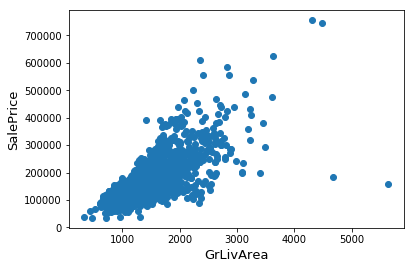

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


從上圖可以發現有兩個價格極低的 GrivArea，我們可以設定條件將其刪除


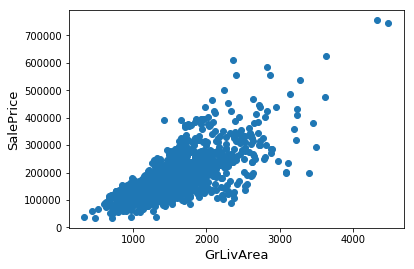

In [7]:
#刪除離群值
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#再次確認是否成功刪除
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



Text(0.5,1,'SalePrice distribution')

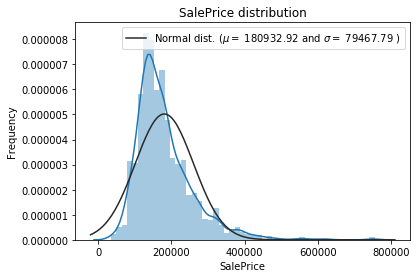

In [8]:
from scipy import stats
from scipy.stats import norm, skew 

sns.distplot(train['SalePrice'] , fit=norm);

# 利用 norm.fit 抓取出 'SalePrice' 的 mu，sigma
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#建立分佈圖
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


我們需要對'SalePrice'進行變換並使其更加正態分佈



 mu = 12.02 and sigma = 0.40



Text(0.5,1,'SalePrice distribution')

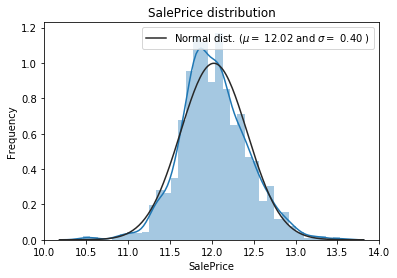

In [9]:
#使用 Numpy的功能 log1p，將SalePrice轉換成log（1 + x）
train["SalePrice"] = np.log1p(train["SalePrice"])

#檢查新的分佈圖
sns.distplot(train['SalePrice'] , fit=norm);

# 利用 norm.fit 抓取出 'SalePrice' 的 mu，sigma
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#建立分佈圖
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 特徵擷取

先將 train & test data 合併再一起

In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### 缺失值處理

In [11]:
# 利用 all_data.isnull().sum() 查詢資料缺失筆數並且相加
# 在除以all_data長度 *100，計算百分比
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
#刪除資料缺失值為0%的特徵值，必且將其排序
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


### 將缺失值百分比作圖

Text(0.5,1,'Percent missing data by feature')

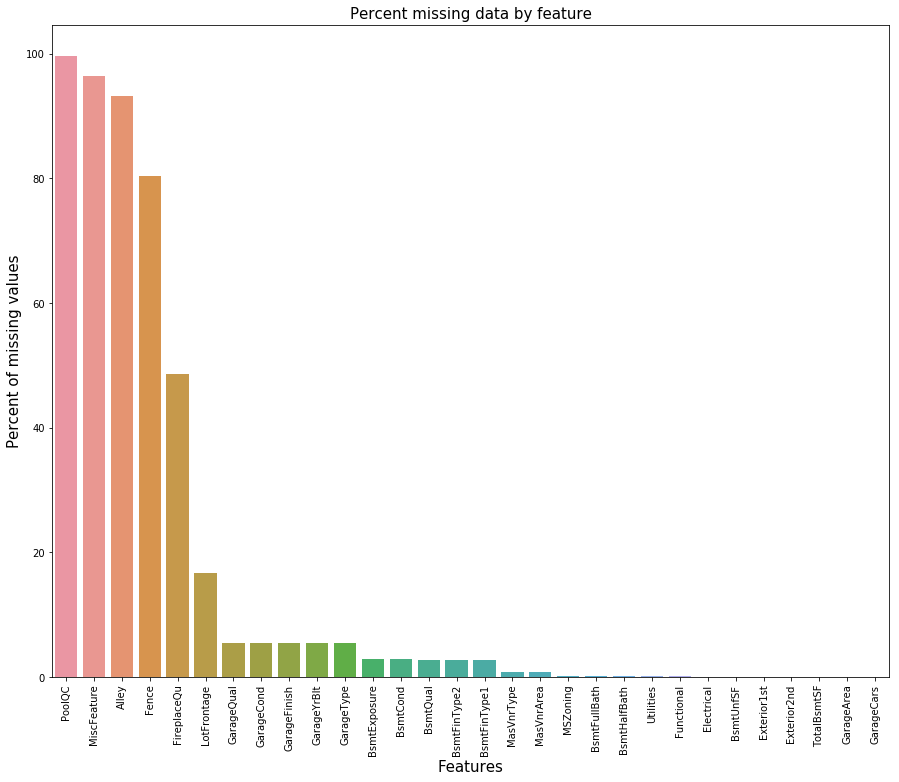

In [12]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### 數據關聯性

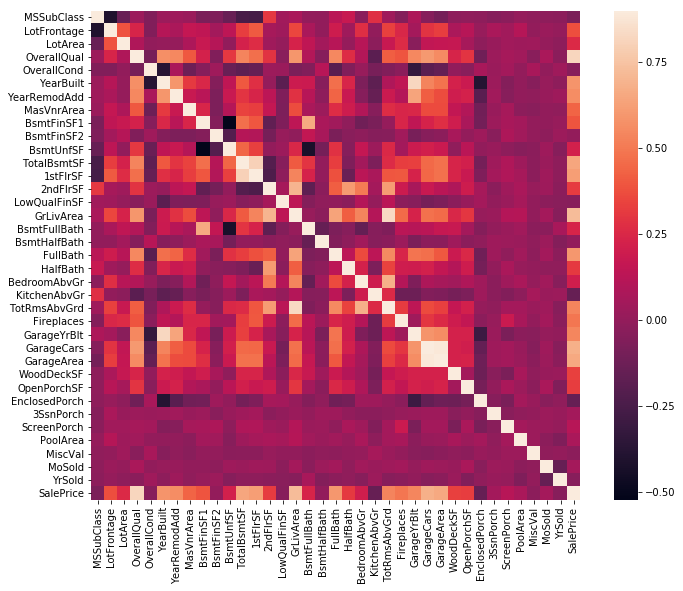

In [13]:
#利用熱力圖查看'SalePrice'與其他特徵值的相關係數
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### 缺失值補值

#### 將通過依次處理缺失值的特徵來推測

PoolQC

顯示為'NA'，表示此住家無泳池，鑒於缺失值極高(>96%)，表示大部分房屋都沒泳池

In [14]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

MiscFeature

顯示為'NA'，表示這個住家沒有其他附加功能

In [15]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Alley 

顯示為'NA'，表示這個住家沒有小巷

In [16]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Fence 

顯示為'NA'，表示這個住家沒有籬笆

In [17]:
all_data["Fence"] = all_data["Fence"].fillna("None")

FireplaceQu 

顯示為'NA'，表示這個住家沒有壁爐

In [18]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

LotFrontage 

按鄰域分組，並填寫所有鄰域的LotFrontage的缺失值

In [19]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond

用'None'代替缺失值

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars

用'0'代替缺失值(沒有車庫就是為沒有車)

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath

缺失值補0(視為沒有地下室)

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2

對於所有這些類別的地下室相關特徵，NaN意味著沒有地下室

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

MasVnrArea and MasVnrType

NA最有可能意味著這些房子沒有石工飾面。我們可以為 MasVnrArea 填充0，為 MasVnrType 填充None。

In [24]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification)

缺失值填補眾數"RL"

In [25]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Utilities 

此特徵值大多為 'ALLPub'，只有一個'NoSeWa'&二個'NA'，且皆在train data，
因此可以將其刪除。

In [26]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional 

資料集說明書表示'NA'即為'typical'

In [27]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical 

KitchenQual

Exterior1st and Exterior2nd

SaleType 

僅有一個缺失值，可以利用眾數填補

In [28]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass 

"NA"最有可能意味著沒有建築類，可以用None替換缺失的值

In [29]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

再次確認是否有缺失值

In [30]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
Electrical,0.034282


針對要 Label Encoding之特徵值轉換為 string形式

In [31]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

進行 Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# 查看 all_data 形狀       
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


由於面積相關特徵對於確定房價非常重要，因此我們增加了一個特徵，即每個房屋的地下室，一樓和二樓的總面積

In [33]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

傾斜特徵

為何要處理數據傾斜（Data Skew）?

不讓資料受到離群值的影響太多，同時讓資料盡可能呈現常態分布

skew定義
偏度（skewness），是統計數據分布偏斜方向和程度的度量，是統計數據分布非對稱程度的數字特徵。偏度(Skewness)亦稱偏態、偏態係數。 
表徵概率分布密度曲線相對于平均值不對稱程度的特徵數。值觀看来就是密度函数曲線尾部的相對長度。 

In [34]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


Box Cox轉換（高度）傾斜特徵

我們使用scipy函數boxcox1p來計算 1+x 的Box-Cox變換，設置 λ=0 等同於上面用於目標變量的log1p。

In [35]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


將 Label 標籤欄位轉換為Onehot encoding

In [36]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


新的 train & test

In [37]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# 建立模型

### 載入所需模組

In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## 定義交叉驗證

我們使用Sklearn的cross_val_score函數，但是這個函數沒有隨機播放，因此加上KFold，以便在交叉驗證之前對數據集進行混洗

K折交叉驗證

1.將數據集平均分割成K个等份

2.使用1份數據作為測試數據，其餘作為訓練數據

3.計算測試準確率

4.使用不同的測試集，重複2、3步骤

5.對測試準確率做平均，作為對未知數據預測準確率的估計

參考資料:

[Sklearn-CrossValidation交叉驗證](https://blog.csdn.net/CherDW/article/details/54986863)

In [39]:
#驗證函數
n_folds = 5

def rmsle_cv(model):
    #KFold.get_n_splits 返回交叉驗證器中的拆分迭代次數
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    # np.sqrt 返回數字x的平方根
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 基礎模型

### LASSO Regression

參考資料:
    
[機器學習算法實踐-岭迴歸和LASSO](https://zhuanlan.zhihu.com/p/30535220)

[Lasso算法-維基百科](https://zh.wikipedia.org/wiki/Lasso%E7%AE%97%E6%B3%95)

該模型可能對異常值非常敏感，因此需要讓它更加健壯。在管道上使用sklearn的Robustscaler（）方法

串行化，通过Pipeline類實現

參考資料:

[sklearn學習筆記3——pipeline](https://blog.csdn.net/wateryouyo/article/details/53909636)

如果數據中含有異常值，那麼使用均值和方差縮放數據的效果並不好，這種情况下，可以使用robust_scale和RobustScaler。

example

class sklearn.preprocessing.RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True) 

In [40]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

### Elastic Net Regression

是一種使用L1和L2先驗作為正則化矩陣的線性回歸模型，這種组合用于只有很少的權重非零的稀疏模型，比如:class Lasso，但是又能保持:class Ridge 的正則化屬性

參考資料:
    
[弹性网络（ Elastic Net)](https://blog.csdn.net/bbbeoy/article/details/72520538)

In [41]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

### Kernel Ridge Regression

Kernel Ridge Regression即使用核技巧的岭回歸（L2正則線性迴歸）

參考資料:
    
[sklearn淺析（六）——Kernel Ridge Regression](https://blog.csdn.net/qsczse943062710/article/details/76021034)

In [42]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### Gradient Boosting Regression

梯度提升回歸（Gradient boosting regression，GBR）是一種從它的錯誤中進行學習的技術，它本質上就是集思廣益，集成一堆较差的學習算法進行學習

參考資料:
    
[scikit-learn : GBR (Gradient boosting regression)](https://blog.csdn.net/SA14023053/article/details/51817650)

[決策樹學習-wiki](https://zh.wikipedia.org/wiki/%E5%86%B3%E7%AD%96%E6%A0%91%E5%AD%A6%E4%B9%A0)

In [43]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### XGBoost

傳統GBDT以CART作為基分類器，xgboost還支持線性分類器，

這個时候xgboost相當于带L1和L2正則化項的邏輯斯蒂迴歸（分類問題）或者線性迴歸（迴歸問題）。

參考資料:

[XGBoost中文教程](http://xgboost.apachecn.org/cn/latest/get_started/)
    
[xgboost入門與實戰（原理篇）](https://hk.saowen.com/a/54abf0cb5f9967dd8da2a8f7ef4126dca5d475de7ddd4debc901f6d11ab3718b)

安裝教學:
    
[XGBoost安裝指南](http://xgboost.apachecn.org/cn/latest/build.html)

In [44]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### LightGBM

lightGBM包含兩個關鍵點：light即輕量級，GBM 梯度提升機

LightGBM 是一個梯度 boosting 框架，使用基于學習算法的決策樹。它可以說是分布式的，高效的，有以下優勢：

1.更快的訓練效率

2.低內存使用

3.更高的準確率

4.支持並行化學習

5.可處裡大規模數據

參考資料:

[LightGBM 的中文文檔](http://lightgbm.apachecn.org/cn/latest/)

安裝教學:

[Linux 下安装LightGBM](https://blog.csdn.net/a14206149/article/details/72884127)

In [45]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### 基礎模型分數

In [46]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [47]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [48]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [49]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1183 (0.0086)



In [50]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1161 (0.0079)



In [51]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1155 (0.0072)



## 堆疊模型

### 最簡單的堆疊方法：平均基礎模型

In [52]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 複製原始的model並且讓其fit data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # 訓練複製的model
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #針對複製模型去做預測
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

### 平均基礎模型分數

這裡僅用 ENet，GBoost，KRR and lasso，也可再加入其他模型

In [53]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1092 (0.0078)



## Adding a Meta-model

在平均基礎模型上添加Meta-model，並使用這些基礎模型的折疊後預測來訓練Meta-model

訓練部分的程序如下:
    
1.將資料切分成訓練資料集和測試資料集

2.將訓練資料集丟入模型訓練

3.將測試資料及丟入模型預測

4.將預測值加進新的資料表

5.重複n個模型

6.使新資料表適合新模型

![](stacking.PNG)

參考資料:
    
[Stacking](https://www.kaggle.com/getting-started/18153#post103381)

### 堆疊平均模型類

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # 複製原始的model並且讓其fit data
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # 訓練複製的 base models 然後創建 out-of-fold-predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # 訓練複製的 meta-model 使用 out-of-fold predictions當作新的特徵值  
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # 對測試數據進行所有base model的預測，並使用平均預測作為最終預測的meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

### 堆疊平均模型類分數

只平均Enet KRR和Gboost，然後我們添加LASSO Regression作為meta-model

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0075)


我們將XGBoost和LightGBM添加到之前定義的StackedRegressor中

定義一個rmsle評估函數

In [56]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### 最終訓練和預測

### StackedRegressor

In [57]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
#expm1(x) := exp(x) - 1
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07816052464759098


### XGBoost

In [58]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.078365221309773


### LightGBM

In [59]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07293587088600212


### 訓練集的RMSLE分數

In [60]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07538156085694332


### 集成預測

In [61]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

### 提交Submission至Kaggle

In [62]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('./Submission/submission.csv',index=False)

### Kaggle排名

![KaggleRank](Kaggle_Rank.PNG)

## 文章參考資料

1.[Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

2.[Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

3.[A study on Regression applied to the Ames dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)

4.[Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)